In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

In [10]:
class Operation():
    def __init__(self, input_nodes):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def computer(self):
        pass
    
class multiply(Operation):
    def __init__(self, loperand, roperand):
        super().__init__([loperand, roperand])
        
    def compute(self, x, y):
        self.inputs = [x, y]
        return x * y
    
class add(Operation):
    def __init__(self, loperand, roperand):
        super().__init__([loperand, roperand])
        
    def compute(self, x, y):
        self.inputs = [x, y]
        return x + y
    
class matmul(Operation):
    def __init__(self, loperand, roperand):
        super().__init__([loperand, roperand])
        
    def compute(self, x, y):
        self.inputs = [x, y]
        return x.dot(y)

In [17]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)
        
class Variable():
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)
        
class Graph():
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [27]:
g = Graph()
g.set_as_default()

A = Variable(10)
b = Variable(1)
x = Placeholder()

y = multiply(A,x)
z = add(y,b)

def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

class Session():
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [28]:
sess = Session()
result = sess.run(operation=z,feed_dict={x:10})
print(result)

101


In [31]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,1])
x = Placeholder()

y = matmul(A,x)
z = add(y,b)

sess = Session()
sess.run(operation=z, feed_dict={x:10})

array([[101, 201],
       [301, 401]])

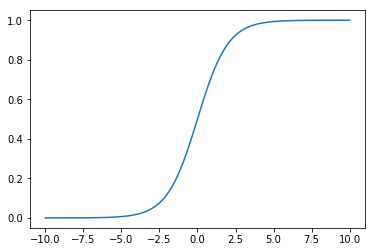

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z, sample_a)

In [36]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z))
    

data = make_blobs(n_samples=200,n_features=2,centers=2,random_state=42)
print(data)




(array([[ 3.04545118,  1.37379466],
       [ 4.9625974 ,  1.14593874],
       [ 4.66438901,  2.47116798],
       [-3.57150134,  9.48787856],
       [ 4.9208707 ,  1.35047016],
       [ 6.78382293,  2.60708871],
       [ 4.75339618,  2.63530036],
       [ 4.16493353,  1.31984045],
       [-2.95571258,  9.87068492],
       [ 5.49753846,  1.81323115],
       [-2.44896741, 11.47752824],
       [ 5.53947871,  2.2804692 ],
       [-1.10640331,  7.61243507],
       [ 5.18697622,  1.77097703],
       [ 1.3986115 ,  0.94878204],
       [-0.64342311,  9.48811905],
       [ 4.86397132,  1.98576208],
       [ 3.63386145,  0.75898107],
       [ 4.15451529,  2.05504382],
       [ 3.9095122 ,  2.18962827],
       [ 5.32183181,  1.66290293],
       [ 5.1549141 ,  2.48695563],
       [-1.04354885,  8.78850983],
       [ 3.81088383,  1.41298864],
       [-2.18511365,  8.62920385],
       [-3.05358035,  9.12520872],
       [ 5.14486612,  2.83892488],
       [-1.68665271,  7.79344248],
       [ 3.74146416

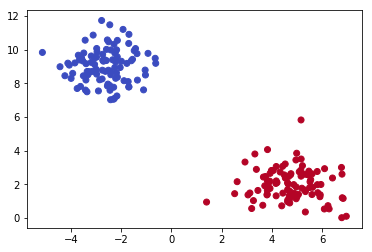

In [37]:
features = data[0]
labels = data[1]

plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

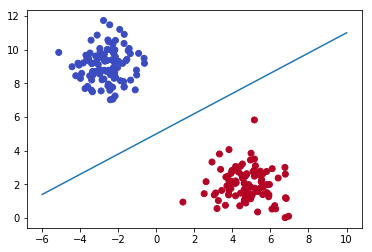

In [50]:
x = np.linspace(10,-6,8)
y = 0.6 * x + 5

plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x, y)
